# 3.2. 线性回归的从零开始实现


In [10]:
import random

# %matplotlib inline
import torch
from d2l.torch import d2l

## 3.2.1. 生成数据集

In [11]:
# 生成数据集

def synthetic_data(w, b, num_examples):  #@save
    """"生成 y = Xw + b + 噪音"""
    x = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape((-1, 1))


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, lebels = synthetic_data(true_w, true_b, 1000)

print('features:', features[0], '\nlabel:', lebels[0])

features: tensor([ 1.0201, -1.1089]) 
label: tensor([10.0070])


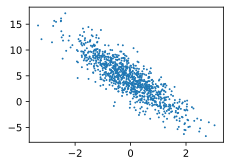

In [12]:
# 生成数据的散点图，
d2l.set_figsize()
d2l.plt.scatter(
    features[:, (1)].detach().numpy(),
    lebels.detach().numpy(),
    1
);

## 3.2.2. 读取数据集

In [14]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = \
        torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]